<a href="https://colab.research.google.com/github/inuwamobarak/document-clustering/blob/main/Clustering_documents_with_Python_Using_the_Wikipedia_Python%C2%A0package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering documents with Python Using the Wikipedia Python package

In [ ]:
# importing default libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing wikipedia library
!pip install wikipedia
import wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# testing the import with sample article "Analytics"
print(wikipedia.summary("Analytics"))

Analysis (PL: analyses) is the process of breaking a complex topic or substance into smaller parts in order to gain a better understanding of it. The technique has been applied in the study of mathematics and logic since before Aristotle (384–322 B.C.), though analysis as a formal concept is a relatively recent development.The word comes from the Ancient Greek ἀνάλυσις (analysis, "a breaking-up" or "an untying;" from ana- "up, throughout" and lysis "a loosening"). From it also comes the word's plural, analyses.
As a formal concept, the method has variously been ascribed to Alhazen, René Descartes (Discourse on the Method), and Galileo Galilei. It has also been ascribed to Isaac Newton, in the form of a practical method of physical discovery (which he did not name).
The converse of analysis is synthesis: putting the pieces back together again in a new or different whole. 




In [ ]:
# Article to be clustered
articles = ['Analytics', 'Lawsuit', 'Military', 'Economy', 'Health', 'Education', 'Food', 'Languages', 'Africa', 'Countries', 'Finance', 'Earth', 'Agriculture', 'Plants']

In [ ]:
# Loading contents

article_content = []
article_title = []

for article in articles:
    print("Loading Article: ", article) # Display the list of articles while searching through wikipedia pages
    article_content.append(wikipedia.page(article).content) # Get a WikipediaPage object for the page with title in list "article"
    article_title.append(article)

Loading Article:  Analytics
Loading Article:  Lawsuit
Loading Article:  Military
Loading Article:  Economy
Loading Article:  Health
Loading Article:  Education
Loading Article:  Food
Loading Article:  Languages
Loading Article:  Africa
Loading Article:  Countries
Loading Article:  Finance
Loading Article:  Earth
Loading Article:  Agriculture
Loading Article:  Plants


In [ ]:

print("examine content")
article_title

examine content


['Analytics',
 'Lawsuit',
 'Military',
 'Economy',
 'Health',
 'Education',
 'Food',
 'Languages',
 'Africa',
 'Countries',
 'Finance',
 'Earth',
 'Agriculture',
 'Plants']

In [ ]:
print(article_content[2]) # printing sample article at index [2]

A military, also known collectively as armed forces, is a heavily armed, highly organized force primarily intended for warfare. It is typically authorized and maintained by a sovereign state, with its members identifiable by their distinct military uniform. It may consist of one or more military branches such as an army, navy, air force, space force, marines, or coast guard. The main task of the military is usually defined as defence of the state and its interests against external armed threats.
In broad usage, the terms armed forces and military are often treated as synonymous, although in technical usage a distinction is sometimes made in which a country's armed forces may include both its military and other paramilitary forces. There are various forms of irregular military forces, not belonging to a recognized state; though they share many attributes with regular military forces, they are less often referred to as simply military.

A nation's military may function as a discrete soci

In [ ]:
# Data Preparations

from sklearn.feature_extraction.text import TfidfVectorizer

from spacy.lang.en.stop_words import STOP_WORDS

type(STOP_WORDS)

vectorizer = TfidfVectorizer(stop_words=list(STOP_WORDS))

X = vectorizer.fit_transform(article_content)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

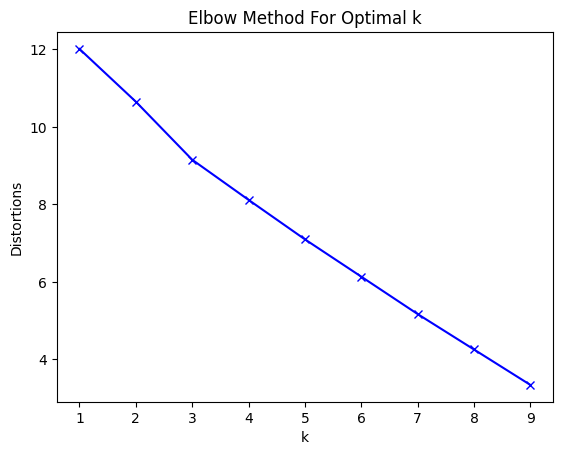

In [ ]:
distortions = []
inertias = []
K = range(1,10)
for k in K:
    # Building and fitting model
    kmeanModel = KMeans(n_clusters=k, max_iter=200, n_init=10)
    kmeanModel = kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(article_title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

          title  cluster
12  Agriculture        0
3       Economy        1
5     Education        1
8        Africa        1
9     Countries        1
10      Finance        1
0     Analytics        2
6          Food        2
7     Languages        2
4        Health        3
11        Earth        3
1       Lawsuit        4
2      Military        5
13       Plants        5


Cluster: 0
Titles
Agriculture


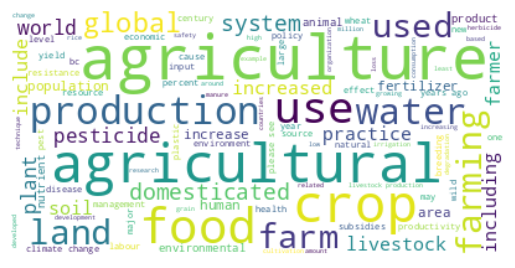

Cluster: 1
Titles
  Economy
Education
   Africa
Countries
  Finance


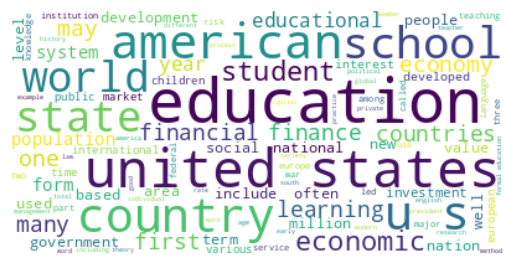

Cluster: 2
Titles
Analytics
     Food
Languages


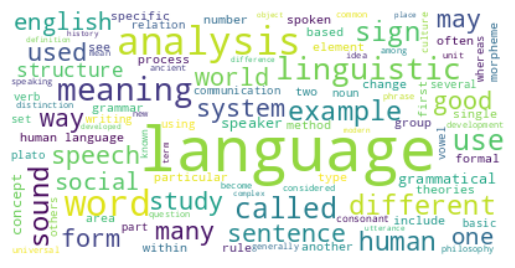

Cluster: 3
Titles
Health
 Earth


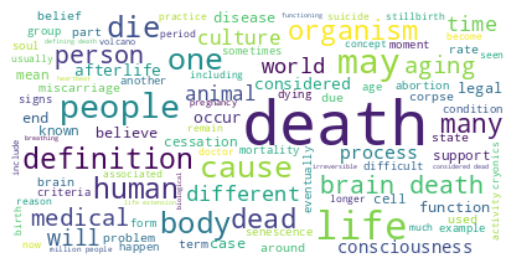

Cluster: 4
Titles
Lawsuit


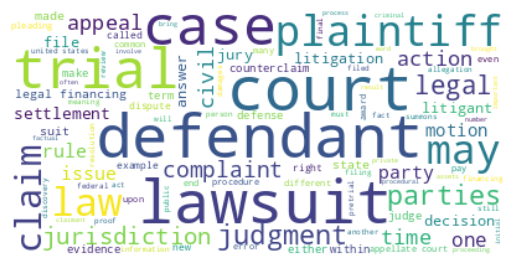

Cluster: 5
Titles
Military
  Plants


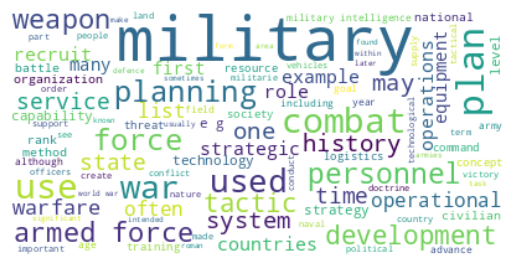

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':article_content}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()